In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn import model_selection
import os

In [9]:
RANDOM_SEED = 42
NUM_CLASSES = 26
dataset = 'keypoint_classifier/keypoint_key_letters_right.csv'
model_save_path = 'keypoint_classifier/New_Dataset_GRU_model_right.hdf5'

In [10]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [11]:

X_train = X_train[:, None, :]
print(X_train.shape)

(186, 1, 42)


In [12]:
X_test = X_test[:, None, :]
print(X_test.shape)

(63, 1, 42)


In [13]:
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from keras.layers import GRU
model = Sequential()
model.add(GRU(50, return_sequences=True, input_shape=(1,2*21)))
model.add(Dropout(0.2))
model.add(GRU(100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(NUM_CLASSES, activation = "softmax"))

In [14]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

# model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# callback for early abort
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

 # model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 1, 50)             14100     
                                                                 
 dropout_2 (Dropout)         (None, 1, 50)             0         
                                                                 
 gru_3 (GRU)                 (None, 100)               45600     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 26)                2626      
                                                                 
Total params: 62,326
Trainable params: 62,326
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(
    X_train,
    y_train,
    epochs=500,
    batch_size=128,
    validation_data=(X_test, y_test),
)

Epoch 1/500
2/2 [==============================] - 0s 72ms/step - loss: 0.8716 - accuracy: 0.7151 - val_loss: 1.4827 - val_accuracy: 0.5397
Epoch 2/500
2/2 [==============================] - 0s 30ms/step - loss: 0.8706 - accuracy: 0.7097 - val_loss: 1.4830 - val_accuracy: 0.5397
Epoch 3/500
2/2 [==============================] - 0s 33ms/step - loss: 0.8561 - accuracy: 0.7204 - val_loss: 1.4818 - val_accuracy: 0.5397
Epoch 4/500
2/2 [==============================] - 0s 33ms/step - loss: 0.8455 - accuracy: 0.7419 - val_loss: 1.4732 - val_accuracy: 0.5397
Epoch 5/500
2/2 [==============================] - 0s 32ms/step - loss: 0.8267 - accuracy: 0.7473 - val_loss: 1.4660 - val_accuracy: 0.5397
Epoch 6/500
2/2 [==============================] - 0s 26ms/step - loss: 0.8671 - accuracy: 0.7043 - val_loss: 1.4592 - val_accuracy: 0.5397
Epoch 7/500
2/2 [==============================] - 0s 33ms/step - loss: 0.8944 - accuracy: 0.6720 - val_loss: 1.4588 - val_accuracy: 0.5556
Epoch 8/500
2/2 [===

2/2 [==============================] - 0s 3ms/step


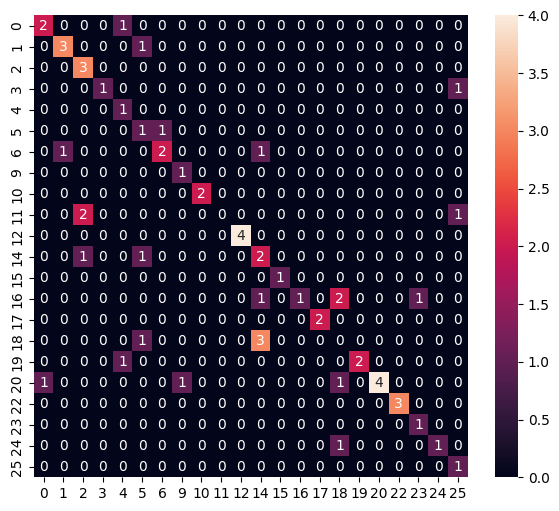

Classification Report
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.75      0.75      0.75         4
           2       0.50      1.00      0.67         3
           3       1.00      0.50      0.67         2
           4       0.33      1.00      0.50         1
           5       0.25      0.50      0.33         2
           6       0.67      0.50      0.57         4
           8       0.00      0.00      0.00         0
           9       0.50      0.50      0.50         2
          10       1.00      1.00      1.00         2
          11       0.00      0.00      0.00         3
          12       1.00      1.00      1.00         4
          14       0.29      0.50      0.36         4
          15       1.00      1.00      1.00         1
          16       1.00      0.20      0.33         5
          17       1.00      1.00      1.00         2
          18       0.00      0.00      0.00         4
     

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg

In [17]:
# callback needs to be done better, but still accuracy 86%
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

In [12]:
model = Sequential()
model.add(GRU(50, return_sequences=True, input_shape=(1,2*21)))
model.add(Dropout(0.5))
model.add(GRU(100, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation = "softmax"))

model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

# model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# callback for early abort
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

 # model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 1, 50)             14100     
                                                                 
 dropout_4 (Dropout)         (None, 1, 50)             0         
                                                                 
 gru_5 (GRU)                 (None, 100)               45600     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 30)                3030      
                                                                 
Total params: 62,730
Trainable params: 62,730
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(
    X_train,
    y_train,
    epochs=500,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/500
1/3 [=========>....................] - ETA: 0s - loss: 3.3014 - accuracy: 0.0781
Epoch 1: saving model to keypoint_classifier\New_Dataset_GRU_model.hdf5
3/3 [==============================] - 0s 34ms/step - loss: 3.2640 - accuracy: 0.1053 - val_loss: 3.4086 - val_accuracy: 0.0174
Epoch 2/500
1/3 [=========>....................] - ETA: 0s - loss: 3.2852 - accuracy: 0.1016
Epoch 2: saving model to keypoint_classifier\New_Dataset_GRU_model.hdf5
3/3 [==============================] - 0s 24ms/step - loss: 3.2581 - accuracy: 0.0936 - val_loss: 3.4067 - val_accuracy: 0.0174
Epoch 3/500
1/3 [=========>....................] - ETA: 0s - loss: 3.2284 - accuracy: 0.1484
Epoch 3: saving model to keypoint_classifier\New_Dataset_GRU_model.hdf5
3/3 [==============================] - 0s 25ms/step - loss: 3.2561 - accuracy: 0.1111 - val_loss: 3.4055 - val_accuracy: 0.0174
Epoch 4/500
1/3 [=========>....................] - ETA: 0s - loss: 3.2366 - accuracy: 0.1172
Epoch 4: saving model to key

4/4 [==============================] - 1s 1ms/step


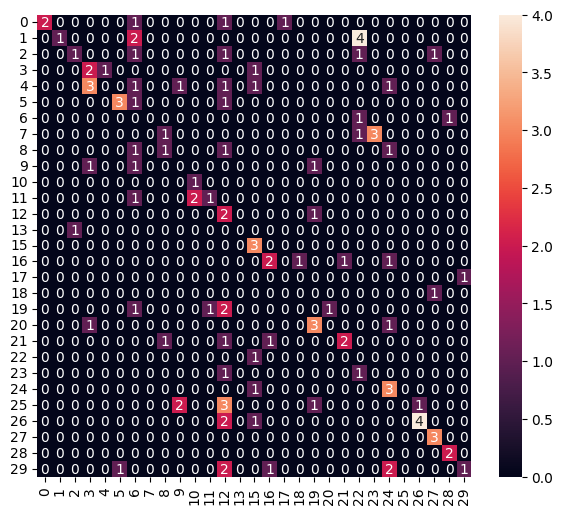

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       1.00      0.14      0.25         7
           2       0.50      0.20      0.29         5
           3       0.29      0.50      0.36         4
           4       0.00      0.00      0.00         8
           5       0.75      0.60      0.67         5
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         5
           8       0.33      0.25      0.29         4
           9       0.00      0.00      0.00         3
          10       0.33      1.00      0.50         1
          11       0.50      0.25      0.33         4
          12       0.11      0.67      0.19         3
          13       0.00      0.00      0.00         1
          15       0.38      1.00      0.55         3
          16       0.50      0.40      0.44         5
          17       0.00      0.00      0.00         1
     

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

In [16]:
model = Sequential()
model.add(Dense(256, input_shape=(42,), activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(NUM_CLASSES, activation="softmax"))

model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

# model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# callback for early abort
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

 # model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               11008     
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 30)                3870      
                                                                 
Total params: 47,774
Trainable params: 47,774
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.fit(
    X_train,
    y_train,
    epochs=500,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/500


ValueError: in user code:

    File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_3" is incompatible with the layer: expected shape=(None, 42), found shape=(None, 1, 42)
